In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [3]:
data.replace('?', np.nan, inplace = True)
data = data.astype({"age": np.float64, "fare": np.float64})

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='survived', ylabel='fare'>

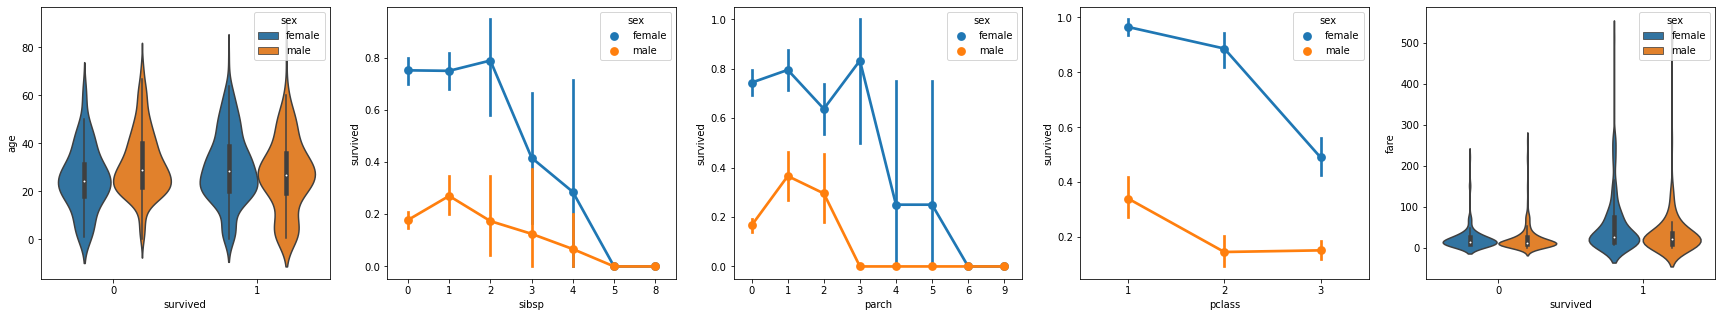

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [5]:
data.replace({'male':1, 'female': 0},inplace=True)

In [6]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [7]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis = 1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [8]:
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [12]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [13]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

2021-12-27 09:40:18.697375: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-27 09:40:18.698500: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-27 09:40:18.708443: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.add(Dense(5, kernel_initializer= 'uniform', activation= 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer= 'uniform', activation= 'relu'))
model.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

2021-12-27 09:47:49.811237: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-27 09:47:49.827390: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2494235000 Hz


Epoch 1/50
27/27 [==============================] - 3s 13ms/step - loss: 0.6929 - accuracy: 0.5264
Epoch 2/50
27/27 [==============================] - 0s 11ms/step - loss: 0.6911 - accuracy: 0.5770
Epoch 3/50
27/27 [==============================] - 0s 11ms/step - loss: 0.6864 - accuracy: 0.6001
Epoch 4/50
27/27 [==============================] - 0s 13ms/step - loss: 0.6774 - accuracy: 0.5975
Epoch 5/50
27/27 [==============================] - 0s 11ms/step - loss: 0.6649 - accuracy: 0.5924
Epoch 6/50
27/27 [==============================] - 0s 12ms/step - loss: 0.6371 - accuracy: 0.7376
Epoch 7/50
27/27 [==============================] - 0s 11ms/step - loss: 0.6121 - accuracy: 0.7707
Epoch 8/50
27/27 [==============================] - 0s 13ms/step - loss: 0.5944 - accuracy: 0.7424
Epoch 9/50
27/27 [==============================] - 0s 10ms/step - loss: 0.5591 - accuracy: 0.7642
Epoch 10/50
27/27 [==============================] - 0s 13ms/step - loss: 0.5228 - accuracy: 0.7926
Epoch 11/

In [29]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/davi3/anaconda3/envs/myenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.7942583732057417
